**Project to predict diabetes_mellitus**

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/WiDS/train.csv',index_col=0,header=0)
df.head()
X=df.drop(columns='diabetes_mellitus')
y=df['diabetes_mellitus']

Check if Dataset is balanced or not

In [3]:
y.value_counts()

0    101853
1     28104
Name: diabetes_mellitus, dtype: int64

Compare two shortlisted models



In [11]:
import xgboost as xgb
xgb_cf1=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_cf2=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=5000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

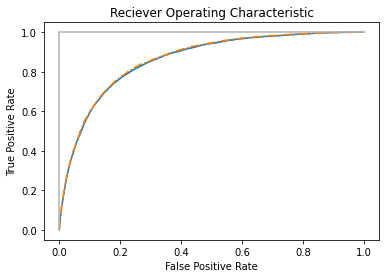

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# train model
xgb_cf1.fit(X_train,y_train)
xgb_cf2.fit(X_train,y_train)

# get predicted probabilities
y_pred1 = xgb_cf1.predict_proba(X_test)[:,1]
y_pred2 = xgb_cf2.predict_proba(X_test)[:,1]

# create true and positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred2)

# plot ROC curve
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate1, true_positive_rate1, ls="-",)
plt.plot(false_positive_rate2, true_positive_rate2, ls="-.",)
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [27]:
print("ROC AUC Score for model 1: {:.4f}".format(roc_auc_score(y_test,y_pred1)))
print("ROC AUC Score for model 2: {:.4f}".format(roc_auc_score(y_test,y_pred2)))

ROC AUC Score for model 1: 0.8606
ROC AUC Score for model 2: 0.8639


In [28]:
y_pred1 = xgb_cf1.predict(X_test)
n_correct1 = sum(y_pred1 == y_test)
print("Model 1 Accuracy {0:.4f}".format(n_correct1 / len(y_pred1)))
y_pred2 = xgb_cf2.predict(X_test)
n_correct2 = sum(y_pred2 == y_test)
print("Model 2 Accuracy {0:.4f}".format(n_correct2 / len(y_pred2)))

Model 1 Accuracy 0.8358
Model 2 Accuracy 0.8374
